<a href="https://colab.research.google.com/github/hydu0016/Pytorch_Udemy/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [76]:
# Check for GPU
!nvidia-smi

Tue Oct  3 14:11:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W /  70W |   1129MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [77]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [78]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data=datasets.MNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform=None)
test_data=datasets.MNIST(root="data",train=True,download=True,transform=ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Text(0.5, 1.0, '5')

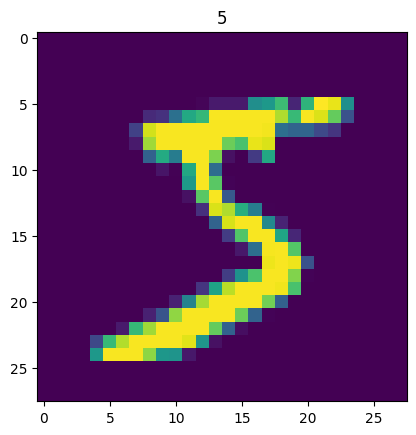

In [79]:
import matplotlib.pyplot as plt

image,label=train_data[0]
len(train_data.data),len(train_data.targets)

plt.imshow(image.squeeze())
plt.title(label)

In [80]:
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

train_dataloader:torch.Size([32, 1, 28, 28])


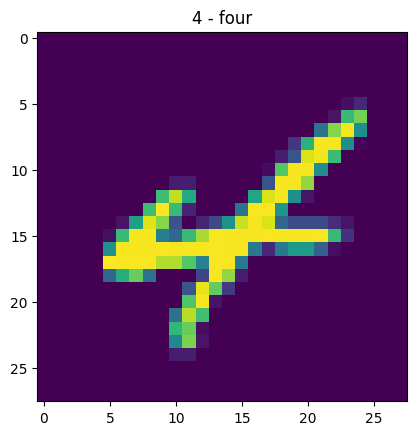

In [81]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

train_features_batch,train_labels_batch=next(iter(train_dataloader))
image1=train_features_batch[1]
image1.shape
plt.imshow(image1.squeeze())
plt.title(class_names[train_labels_batch[1]])

print(f"train_dataloader:{train_features_batch.shape}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [82]:
from torch.nn.modules import linear
from torch import nn

class MNISTModel(nn.Module):
  def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                           kernel_size=3,stride=1,padding=1),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                           kernel_size=3,stride=1,padding=1),
                               nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,stride=2)
                               )
    self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
  def forward(self,x:nn.Module):
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifier(x)

    return x


torch.manual_seed(42)

model=MNISTModel(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)

model



MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [83]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)



from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

helper_functions.py already exists, skipping download


In [84]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [85]:
from torch.utils import data
from re import X
def train_step(model:nn.Module,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,data_loader:torch.utils.data.DataLoader,accuracy_fn,device:torch.device=device):
  model.train()
  train_loss,train_acc=0,0
  model=model.to(device)
  for batch,(X,y) in enumerate(data_loader):
    X=X.to(device)
    y=y.to(device)
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)

def test_step(model:nn.Module,loss_fn:torch.nn.Module,data_loader:torch.utils.data.DataLoader,accuracy_fn,device:torch.device=device):
  model.to(device)
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X=X.to(device)
      y=y.to(device)
      test_pred=model(X)
      loss=loss_fn(test_pred,y)
      test_loss+=loss
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test_loss:{test_loss:.5f}|Test_accuracy:{test_acc:.2f}%\n")

In [86]:
from tqdm import tqdm
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu=timer()

epoches=3

for epoch in tqdm(range(epoches)):
  print(f"Epoch:{epoch}\n---------")
  train_step(model=model,loss_fn=loss_fn,optimizer=optimizer,data_loader=train_dataloader,accuracy_fn=accuracy_fn)
  test_step(model=model,loss_fn=loss_fn,data_loader=test_dataloader,accuracy_fn=accuracy_fn)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------


 33%|███▎      | 1/3 [00:17<00:34, 17.15s/it]

Test_loss:0.08449|Test_accuracy:97.43%

Epoch:1
---------


 67%|██████▋   | 2/3 [00:34<00:17, 17.20s/it]

Test_loss:0.07209|Test_accuracy:97.82%

Epoch:2
---------


100%|██████████| 3/3 [00:52<00:00, 17.45s/it]

Test_loss:0.05419|Test_accuracy:98.31%

Train time on cuda: 52.363 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?